We will study the Structured Causal Model (SCM) described by the following Directed Acyclic Graph (DAG)

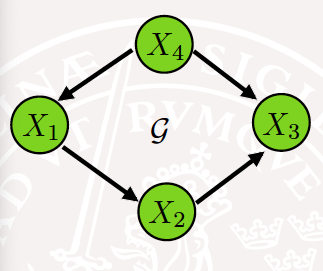

We will assume simple linear relations and normally distributed (Gaussian) noise:

x1 = 2 x4 + n1 \\
x2 = 2 x1 + n2 \\
x3 = 2 x2 + x4 + n3 \\
x4 = n4

In [ ]:
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd

In [ ]:
# Slide 45 of 52 in Lecture 5
# Generate N data points

N = 10000;
n1 = np.random.normal(0,1,N)
n2 = np.random.normal(0,1,N)
n3 = np.random.normal(0,1,N)
n4 = np.random.normal(0,1,N)

x4 = n4
x1 = 2*x4+n1
x2 = 2*x1+n2
x3 = 2*x2 + x4 + n3

dat1 = pd.DataFrame({'x1':x1, 'x2':x2,'x3':x3, 'x4':x4})

Can we find out e.g. how x1 impacts x2 by doing ordinary linear regression ?

We will use the **OLS (ordinary least squares)** function in the Python module smf.

A **tilde-sign ~** is used to separate the left hand side from the right hand side, in the assumed linear relation

By default, an **offset/intercept term** is included. If you do not want that, insert a "-1" at the end.

Use the **"fit" function** to fit the model to data.



In [ ]:
# This gives the correct model for how x1 impacts x2
# results = smf.ols('x2 ~ x1', data=dat1).fit()
# Can get rid of intercept term:
results = smf.ols('x2 ~ x1 -1', data=dat1).fit()
print(results.summary())

# Notice the rows "Intercept" and "x1", indicating that x2 = 2*x1 + 0 + noise
# is the best linear relation between x1 and x2, which is correct

                                 OLS Regression Results                                
Dep. Variable:                     x2   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                          1.994e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        09:12:51   Log-Likelihood:                         -14198.
No. Observations:               10000   AIC:                                  2.840e+04
Df Residuals:                    9999   BIC:                                  2.841e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# This also works
results = smf.ols('x2 ~ x1 + x4 - 1', data=dat1).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     x2   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                          9.972e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        09:16:09   Log-Likelihood:                         -14198.
No. Observations:               10000   AIC:                                  2.840e+04
Df Residuals:                    9998   BIC:                                  2.841e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# This would however not get the causal impact of x1 to x3 correctly identified
# A correct model would give x3 = 4*x1 + noise
results = smf.ols('x3 ~ x1  -1', data=dat1).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     x3   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                          1.864e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        09:16:22   Log-Likelihood:                         -22428.
No. Observations:               10000   AIC:                                  4.486e+04
Df Residuals:                    9999   BIC:                                  4.486e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Adding x4 (confounder compensation) would give a correct model
results = smf.ols('x3 ~ x1 + x4 -1', data=dat1).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     x3   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          9.759e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        09:16:26   Log-Likelihood:                         -22209.
No. Observations:               10000   AIC:                                  4.442e+04
Df Residuals:                    9998   BIC:                                  4.444e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#But adding both x2 and x4 would destroy the model
results = smf.ols('x3 ~ x1 + x2 + x4 -1', data=dat1).fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                     x3   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          3.339e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        09:16:30   Log-Likelihood:                         -14231.
No. Observations:               10000   AIC:                                  2.847e+04
Df Residuals:                    9997   BIC:                                  2.849e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We will on the next lecture understand how  correct causality inference can be done if we have knowledge of the DAG. We will also learn some methods for how to do it.